<a href="https://colab.research.google.com/github/flash-berry/MachineLearning/blob/main/lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Изучите возможности sklearn для решения задач Multiclass classification, Multilabel classification и Multioutput Regression.

 Найдите данные, на которых можно решить задачу Multiclass classification (классификация с более чем двумя классами). В крайнем случае преобразуйте данные, предназначенные для другой задачи.

 Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи.

 При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).

 Используя стратегии OneVsRest, OneVsOne и OutputCode решите задачу Multiclass classification для каждого из пройденных базового алгоритма классификации (logistic regression, svm, knn, naive bayes, decision tree). При обучении использовать подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания.

 Замерить время обучения каждой модели для каждой стратегии.

 Для оценки качества моделей используйте метрику AUC-ROC.

 Сравнить время обучения и качество всех моделей и всех стратегий. Сделать выводы.

 * (+3 балла) Повторить все пункты для задачи Multilabel classification (классификация с несколькими целевыми признаками, например, бинарными). В качестве стратегий попробовать MultiOutputClassifier и ClassifierChain.

 * (+2 балла) Повторить все пункты для задачи Multioutput Regression (регрессия с несколькими целевыми признаками, вещественными). Модель попробовать как минимум одну: Ridge. В качестве стратегий попробовать MultiOutputRegressor и RegressorChain. В качестве метрики использовать R2.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

Загрузим датасет для Multiclass classification с Kaggle и проведём для него разведочный анализ

In [ ]:
df = pd.read_csv('/content/Student_performance_data _.csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


Для данного датасета интересно было бы предсказывать признак GradeClass для многоклассовой классификации.

---

StudentID : Уникальный идентификатор, присваиваемый каждому студенту (от 1001 до 3392).

Age: Возраст учащихся составляет от 15 до 18 лет.

Gender:  Пол учащихся, где 0 представляет мужской пол, а 1 представляет женский пол.

Ethnicity: этническая принадлежность студентов кодируется следующим образом:

  0: Кавказец

  1: Афроамериканец

  2: Азиатка

  3: Другое

ParentalEducation: уровень образования родителей, кодируется следующим образом:

0: Нет

1: Средняя школа

2: Немного колледжа

3: Бакалавр

4: Высшее

StudyTimeWeekly: еженедельное время обучения в часах, от 0 до 20.

Absence: количество пропусков в течение учебного года, от 0 до 30.

Tutoring: статус репетиторства, где 0 означает «Нет», а 1 означает «Да».

ParentalSupport: уровень родительской поддержки, кодируется следующим образом:

0: Нет

1: Низкий

2: Умеренный

3: Высокий

4: Очень высокий

Extracurricular: участие во внеклассных мероприятиях, где 0 означает «Нет», а 1 означает «Да».

Sports: Участие в спортивных состязаниях, где 0 означает «Нет», а 1 означает «Да».

Music: Участие в музыкальных мероприятиях, где 0 означает «Нет», а 1 означает «Да».

Volunteering: участие в волонтерской деятельности, где 0 означает «Нет», а 1 означает «Да».

GPA: средний балл по шкале от 2,0 до 4,0, на который влияют привычки в учебе, участие родителей и внеклассные мероприятия.

GradeClass: Классификация оценок студентов на основе среднего балла:

0: «отлично» (средний балл >= 3,5)

1: «B» (3,0 <= средний балл < 3,5)

2: «С» (2,5 <= средний балл < 3,0)

3: «D» (2,0 <= средний балл < 2,5)

4: «F» (средний балл < 2,0)


---

Признаки GPA и StudentID можно сразу удалить.

GPA удаляем потому что GPA и GradeClass идентичные признаки. Автор, представленного датасета, объяснил это так:

"When working on educational datasets, it's important to remember that you can't use GPA as a feature variable to predict Class Grade. This is because GPA and Class Grade essentially represent the same thing—they are both measures of a student's academic performance and are targets in their own right.
If you already have the GPA, you can calculate the Class Grade directly without the need for machine learning.
Always ensure you drop GPA if you're using Class Grade as a target (or vice versa) to avoid this common mistake. Many have fallen into this trap, so be cautious and double-check your target variables!"

In [ ]:
df.drop(['GPA', 'StudentID'], axis=1, inplace=True)
df['GradeClass'].value_counts()

,count
GradeClass,
4.0,1211
3.0,414
2.0,391
1.0,269
0.0,107


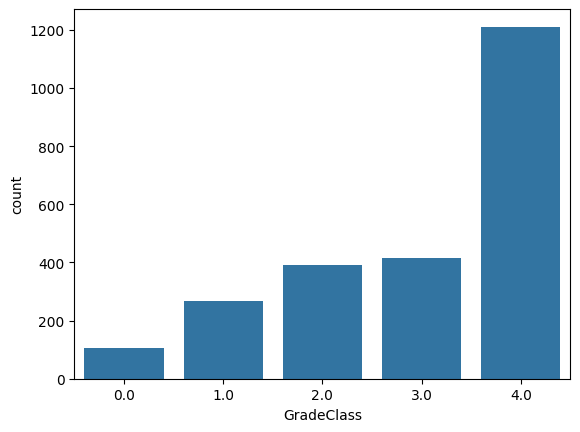

In [ ]:
sns.countplot(x="GradeClass", data=df)
plt.show()

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0
Sports,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GradeClass         2392 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 243.1 KB


Датасет имеет несбалансированные классы и не имеет пропущенных значений

In [ ]:
df = df.drop_duplicates(keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GradeClass         2392 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 243.1 KB


Датасет не имеет дубликатов

In [ ]:
df.describe()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,2.983696
std,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,1.233908
min,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,4.000000
max,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000


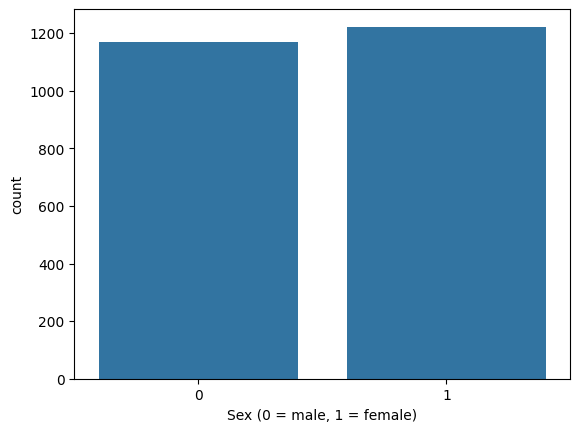

In [ ]:
sns.countplot(x='Gender', data=df)
plt.xlabel("Sex (0 = male, 1 = female)")
plt.show()

Mean(Age) = 0.51 - датасет сбалансирован относительно гендера, имеется маленький перевес в сторону женского пола.

In [ ]:
GradeClass_mean = np.array(df.groupby(['ParentalSupport'])['GradeClass'].mean())
ParentalSupport_nums = np.sort(np.array(df['ParentalSupport'].unique()))
GradeClass_mean

array([3.29245283, 3.14928425, 3.01756757, 2.83787661, 2.70866142])

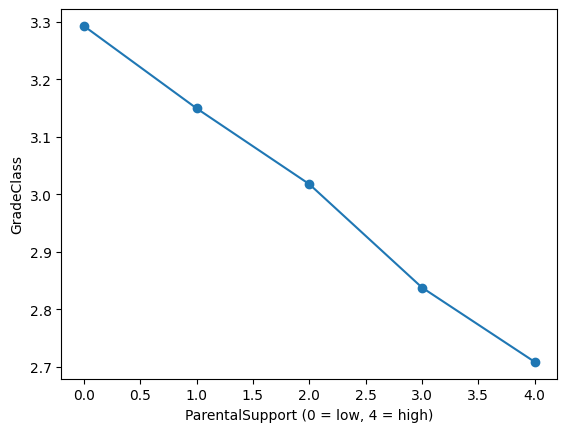

In [ ]:
plt.plot(ParentalSupport_nums, GradeClass_mean, marker='o')

plt.ylabel("GradeClass")
plt.xlabel("ParentalSupport (0 = low, 4 = high)")

plt.show()

Заметна прямая зависимость оценок студента от поддержки родителей.

Чем больше поддержка, тем лучше студент учиться.

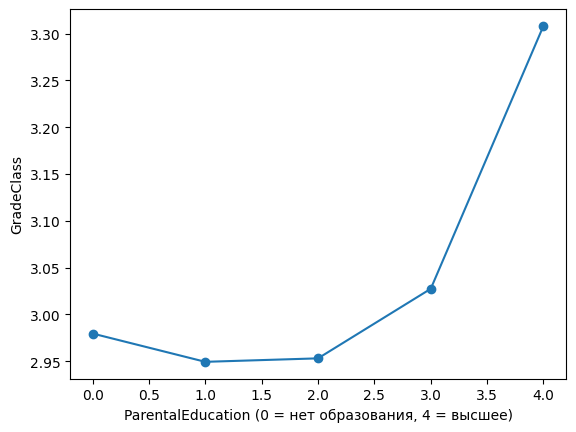

In [ ]:
GradeClass_mean = np.array(df.groupby(['ParentalEducation'])['GradeClass'].mean())
ParentalEducation_nums = np.sort(np.array(df['ParentalEducation'].unique()))

plt.plot(ParentalEducation_nums, GradeClass_mean, marker='o')

plt.ylabel("GradeClass")
plt.xlabel("ParentalEducation (0 = нет образования, 4 = высшее)")

plt.show()

In [ ]:
df['ParentalEducation'].value_counts()

,count
ParentalEducation,
2,934
1,728
3,367
0,243
4,120


Тяжело что-то сказать про зависимость между образованием родителей и успеваемостью студента.

Но для студентов, у которых родители имеют высшее образование явно хуже оценки.

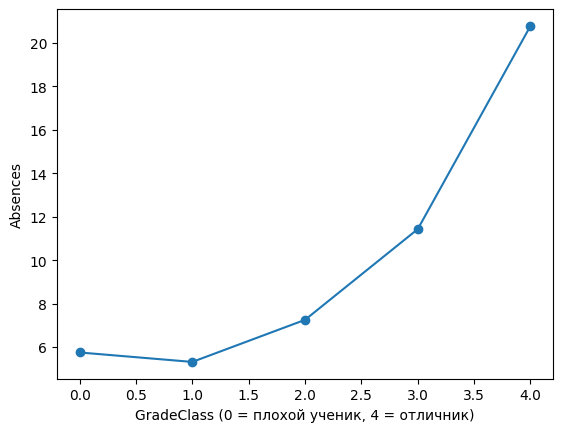

In [ ]:
Absences_mean = np.array(df.groupby(['GradeClass'])['Absences'].mean())
GradeClass_nums = np.sort(np.array(df['GradeClass'].unique()))

plt.plot(GradeClass_nums, Absences_mean, marker='o')

plt.ylabel("Absences")
plt.xlabel("GradeClass (0 = плохой ученик, 4 = отличник)")

plt.show()

Заметна зависимость: чем больше у студента пропусков, тем хуже успеваемость.



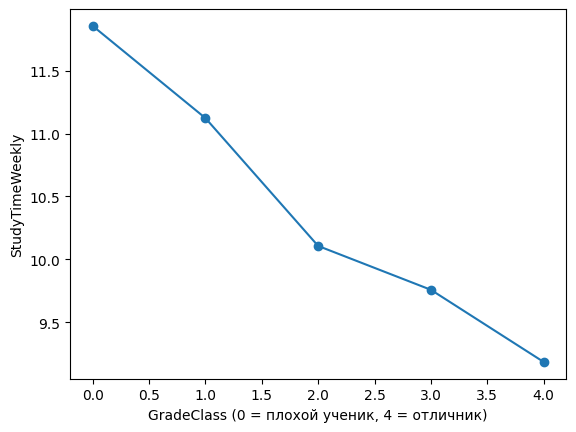

In [ ]:
StudyTimeWeekly_mean = np.array(df.groupby(['GradeClass'])['StudyTimeWeekly'].mean())
GradeClass_nums = np.sort(np.array(df['GradeClass'].unique()))

plt.plot(GradeClass_nums, StudyTimeWeekly_mean, marker='o')

plt.ylabel("StudyTimeWeekly")
plt.xlabel("GradeClass (0 = плохой ученик, 4 = отличник)")

plt.show()

Ярко выраженная зависимость между средним времен потраченным на обучение и успеваемостью

<Axes: xlabel='Tutoring', ylabel='count'>

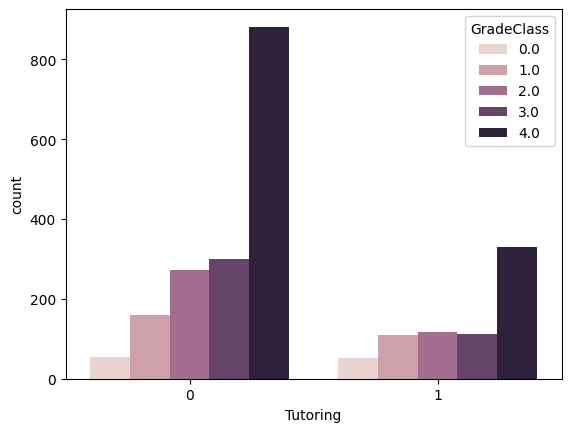

In [ ]:
sns.countplot(x ='Tutoring', hue='GradeClass', data=df)

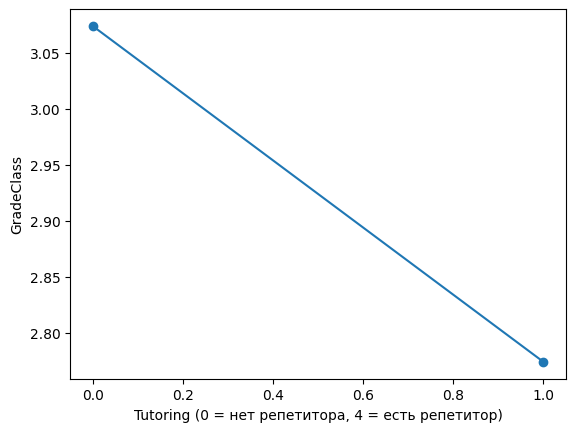

In [ ]:
GradeClass_mean = np.array(df.groupby(['Tutoring'])['GradeClass'].mean())
Tutoring_nums = np.sort(np.array(df['Tutoring'].unique()))

plt.plot(Tutoring_nums, GradeClass_mean, marker='o')

plt.ylabel("GradeClass")
plt.xlabel("Tutoring (0 = нет репетитора, 4 = есть репетитор)")

plt.show()

Люди без репетиторства в среднем имеют на целый балл оценку меньше, чем люди с репетиторством

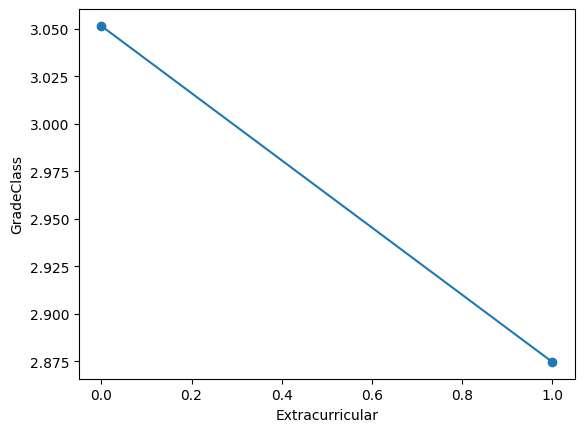

In [ ]:
GradeClass_mean = np.array(df.groupby(['Extracurricular'])['GradeClass'].mean())
Extracurricular_nums = np.sort(np.array(df['Extracurricular'].unique()))

plt.plot(Extracurricular_nums, GradeClass_mean, marker='o')

plt.xlabel("Extracurricular")
plt.ylabel("GradeClass")

plt.show()

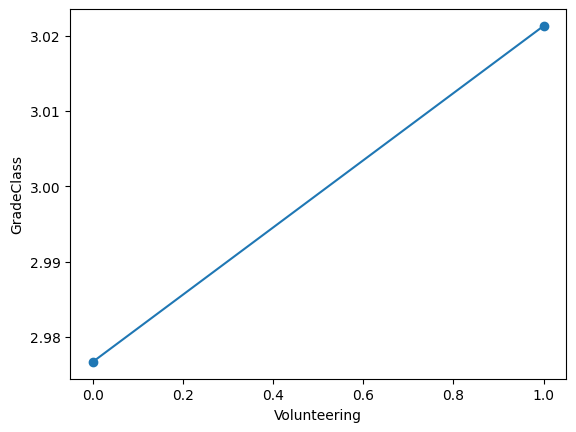

In [ ]:
GradeClass_mean = np.array(df.groupby(['Volunteering'])['GradeClass'].mean())
Volunteering_nums = np.sort(np.array(df['Volunteering'].unique()))

plt.plot(Volunteering_nums, GradeClass_mean, marker='o')

plt.xlabel("Volunteering")
plt.ylabel("GradeClass")

plt.show()

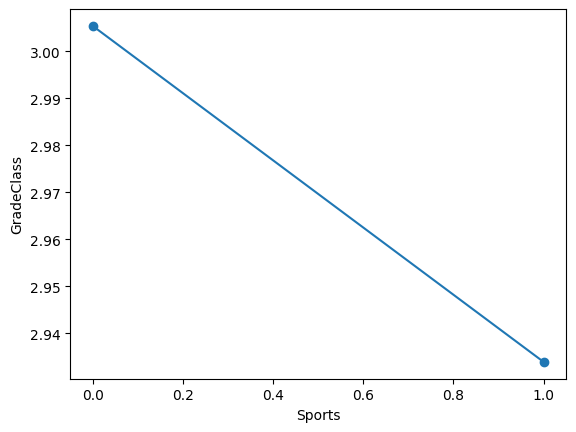

In [ ]:
GradeClass_mean = np.array(df.groupby(['Sports'])['GradeClass'].mean())
Sports_nums = np.sort(np.array(df['Sports'].unique()))

plt.plot(Sports_nums, GradeClass_mean, marker='o')

plt.xlabel("Sports")
plt.ylabel("GradeClass")

plt.show()

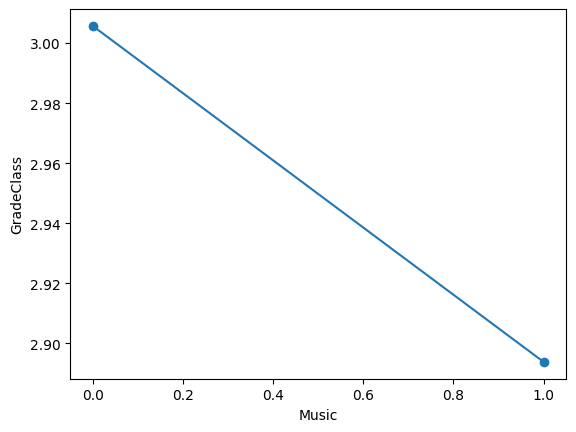

In [ ]:
GradeClass_mean = np.array(df.groupby(['Music'])['GradeClass'].mean())
Music_nums = np.sort(np.array(df['Music'].unique()))

plt.plot(Music_nums, GradeClass_mean, marker='o')

plt.xlabel("Music")
plt.ylabel("GradeClass")

plt.show()

В целом оценки остаются в одном диапазоне вне зависимости от того, есть ли у студента секции либо внеучебная деятельность

Объединим эти признаки в один, а затем удалим

In [ ]:
df['Extra_activities'] = 0  # заполняем сначала значения нового признака нулями
df['Extra_activities'] = df[['Music', 'Sports', 'Volunteering', 'Extracurricular']].sum(axis=1)
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass,Extra_activities
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.0,1
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.0,0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.0,0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,3.0,1
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,4.0,0


In [ ]:
df['Extra_activities'].value_counts()

,count
Extra_activities,
1,1065
0,679
2,527
3,113
4,8


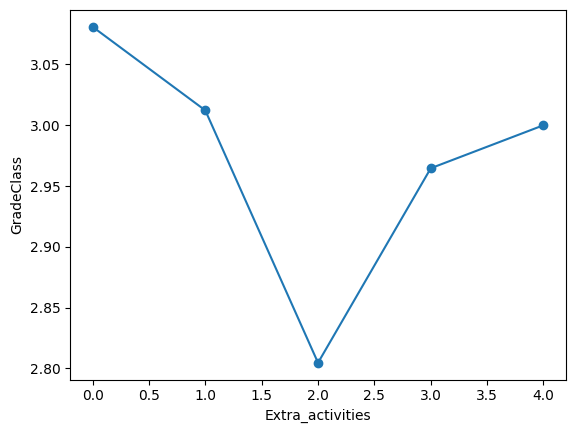

In [ ]:
GradeClass_mean = np.array(df.groupby(['Extra_activities'])['GradeClass'].mean())
Extra_activities_nums = np.sort(np.array(df['Extra_activities'].unique()))

plt.plot(Extra_activities_nums, GradeClass_mean, marker='o')

plt.xlabel("Extra_activities")
plt.ylabel("GradeClass")

plt.show()

В целом зависимость присутствует, чем больше студенты заняты внеучебной деятельностью, тем лучше их успеваемость, но пока они не перегружаются до 3 и 4 секций, НО они всё равно лучше студентов, которые абсолютно ничем не занимаются.

Вывод: дети которые помимо учёбы увлечены полезными секциями более организованны и успешны, чем дети не занятые ничем


---


Закодируем признак Ethnicity с помощью one-hot coding, чтобы избежать предположений о порядке или расстоянии между категориями



---

Преобразуем целевой признак в int

In [ ]:
Ethnicity_dum = pd.get_dummies(df['Ethnicity'], prefix = "Ethnicity", dtype = int)

frames = [df, Ethnicity_dum]
df = pd.concat(frames, axis = 1)
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass,Extra_activities,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.0,1,1,0,0,0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.0,0,1,0,0,0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.0,0,0,0,1,0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,3.0,1,1,0,0,0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,4.0,0,1,0,0,0


In [ ]:
df = df.drop(columns = ['Ethnicity', 'Ethnicity_0', 'Music', 'Sports', 'Volunteering', 'Extracurricular'])
df.head()

,Age,Gender,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,GradeClass,Extra_activities,Ethnicity_1,Ethnicity_2,Ethnicity_3
0,17,1,2,19.833723,7,1,2,2.0,1,0,0,0
1,18,0,1,15.408756,0,0,1,1.0,0,0,0,0
2,15,0,3,4.210570,26,0,2,4.0,0,0,1,0
3,17,1,3,10.028829,14,0,3,3.0,1,0,0,0
4,17,1,2,4.672495,17,1,3,4.0,0,0,0,0


In [ ]:
df['GradeClass'] = df['GradeClass'].astype(int)
df.head()

,Age,Gender,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,GradeClass,Extra_activities,Ethnicity_1,Ethnicity_2,Ethnicity_3
0,17,1,2,19.833723,7,1,2,2,1,0,0,0
1,18,0,1,15.408756,0,0,1,1,0,0,0,0
2,15,0,3,4.210570,26,0,2,4,0,0,1,0
3,17,1,3,10.028829,14,0,3,3,1,0,0,0
4,17,1,2,4.672495,17,1,3,4,0,0,0,0


Закончим разведочный анализ и приступим к обучению для Multiclass classification

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time

y = df['GradeClass']
X = df.drop(columns=['GradeClass'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

results = {}

**Logistic Regression Multiclass classification**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier, OutputCodeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy.special import softmax

C_values = np.logspace(-3, 2, 10)
n_splits = 5
n_repeats = 3
cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

def evaluate_strategy(strategy, name):
    log_reg = LogisticRegression(random_state=42)

    # Определяем стратегию
    if strategy == "OvR":
        clf = OneVsRestClassifier(log_reg)
        multi_class_strategy = 'ovr'  # AUC рассчитывается по стратегии OvR
    elif strategy == "OvO":
        clf = OneVsOneClassifier(log_reg)
        multi_class_strategy = 'ovo'  # AUC рассчитывается по стратегии OvO
    elif strategy == "OutputCode":
        clf = OutputCodeClassifier(log_reg, code_size=2, random_state=42)
        multi_class_strategy = 'ovr'  # Интерпретируем как OvR
    else:
        raise ValueError("Unknown strategy")

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', clf)
    ])

    param_grid = {'classifier__estimator__C': C_values}
    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy', cv=cv, verbose=1)

    start_time = time.time()
    grid.fit(X_train, y_train)
    training_time = time.time() - start_time

    if strategy == "OutputCode":
        y_pred = grid.predict(X_test)
        y_scores = np.zeros((len(y_test), len(np.unique(y_test))))
        for i, pred in enumerate(y_pred):
            y_scores[i, pred] = 1
        y_scores = softmax(y_scores, axis=1)
    else:
        try:
            y_scores = grid.predict_proba(X_test)
        except AttributeError:
            y_scores = grid.decision_function(X_test)
            y_scores = softmax(y_scores, axis=1)

    auc = roc_auc_score(y_test, y_scores, multi_class=multi_class_strategy)

    return {
        "best_params": grid.best_params_,
        "best_score": grid.best_score_,
        "training_time": training_time,
        "auc": auc
    }

strategies = ["OvR", "OvO", "OutputCode"]

for strategy in strategies:
    print(f"Evaluating strategy: {strategy}")
    results['Logistic Regression ' + strategy] = evaluate_strategy(strategy, strategy)

Evaluating strategy: OvR
Fitting 15 folds for each of 10 candidates, totalling 150 fits
Evaluating strategy: OvO
Fitting 15 folds for each of 10 candidates, totalling 150 fits
Evaluating strategy: OutputCode
Fitting 15 folds for each of 10 candidates, totalling 150 fits


**K-Nearest Neighbour Multiclass classification**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = np.arange(1, 11, 2)
weights = ['uniform', 'distance']

n_splits = 5
n_repeats = 3
cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

def evaluate_strategy(strategy, name):
    knn = KNeighborsClassifier()

    # Определяем стратегию
    if strategy == "OvR":
        clf = OneVsRestClassifier(knn)
        multi_class_strategy = 'ovr'  # AUC рассчитывается по стратегии OvR
    elif strategy == "OvO":
        clf = OneVsOneClassifier(knn)
        multi_class_strategy = 'ovo'  # AUC рассчитывается по стратегии OvO
    elif strategy == "OutputCode":
        clf = OutputCodeClassifier(knn, code_size=2, random_state=42)
        multi_class_strategy = 'ovr'  # Интерпретируем как OvR
    else:
        raise ValueError("Unknown strategy")

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', clf)
    ])

    param_grid = {'classifier__estimator__n_neighbors': n_neighbors, 'classifier__estimator__weights': weights}
    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy', cv=cv, verbose=1)

    start_time = time.time()
    grid.fit(X_train, y_train)
    training_time = time.time() - start_time

    if strategy == "OutputCode":
        y_pred = grid.predict(X_test)
        y_scores = np.zeros((len(y_test), len(np.unique(y_test))))
        for i, pred in enumerate(y_pred):
            y_scores[i, pred] = 1
        y_scores = softmax(y_scores, axis=1)
    else:
        try:
            y_scores = grid.predict_proba(X_test)
        except AttributeError:
            y_scores = grid.decision_function(X_test)
            y_scores = softmax(y_scores, axis=1)

    auc = roc_auc_score(y_test, y_scores, multi_class=multi_class_strategy)

    return {
        "best_params": grid.best_params_,
        "best_score": grid.best_score_,
        "training_time": training_time,
        "auc": auc
    }

strategies = ["OvR", "OvO", "OutputCode"]

for strategy in strategies:
    print(f"Evaluating strategy: {strategy}")
    results['KNN ' + strategy] = evaluate_strategy(strategy, strategy)

Evaluating strategy: OvR
Fitting 15 folds for each of 10 candidates, totalling 150 fits
Evaluating strategy: OvO
Fitting 15 folds for each of 10 candidates, totalling 150 fits
Evaluating strategy: OutputCode
Fitting 15 folds for each of 10 candidates, totalling 150 fits


**Support Vector Machin Multiclass classification**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

C = [0.1, 0.25, 0.5, 0.75, 1, 2]
kernel = ["linear", "rbf"]
gamma = ["scale", "auto", 0.0001, 0.001, 0.01, 0.1, 1]

cv = StratifiedKFold(5)

def evaluate_strategy(strategy, name):
    svc = SVC(random_state=42)

    # Определяем стратегию
    if strategy == "OvR":
        clf = OneVsRestClassifier(svc)
        multi_class_strategy = 'ovr'  # AUC рассчитывается по стратегии OvR
    elif strategy == "OvO":
        clf = OneVsOneClassifier(svc)
        multi_class_strategy = 'ovo'  # AUC рассчитывается по стратегии OvO
    elif strategy == "OutputCode":
        clf = OutputCodeClassifier(svc, code_size=2, random_state=42)
        multi_class_strategy = 'ovr'  # Интерпретируем как OvR
    else:
        raise ValueError("Unknown strategy")

    param_grid = {'estimator__kernel': kernel, 'estimator__C': C, 'estimator__gamma': gamma}
    grid = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=cv, verbose=1)

    start_time = time.time()
    grid.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time

    if strategy == "OutputCode":
        y_pred = grid.predict(X_test_scaled)
        y_scores = np.zeros((len(y_test), len(np.unique(y_test))))
        for i, pred in enumerate(y_pred):
            y_scores[i, pred] = 1
        y_scores = softmax(y_scores, axis=1)
    else:
        try:
            y_scores = grid.predict_proba(X_test_scaled)
        except AttributeError:
            y_scores = grid.decision_function(X_test_scaled)
            y_scores = softmax(y_scores, axis=1)

    auc = roc_auc_score(y_test, y_scores, multi_class=multi_class_strategy)

    return {
        "best_params": grid.best_params_,
        "best_score": grid.best_score_,
        "training_time": training_time,
        "auc": auc
    }

strategies = ["OvR", "OvO", "OutputCode"]

for strategy in strategies:
    print(f"Evaluating strategy: {strategy}")
    results['SVC ' + strategy] = evaluate_strategy(strategy, strategy)

Evaluating strategy: OvR
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Evaluating strategy: OvO
Fitting 5 folds for each of 84 candidates, totalling 420 fits
Evaluating strategy: OutputCode
Fitting 5 folds for each of 84 candidates, totalling 420 fits


**Naive Bayes Algorithm Multiclass classification**

In [ ]:
from sklearn.naive_bayes import GaussianNB

priors = [None, [0.62, 0.38]]
var_smoothing = np.logspace(0, -9, num=100)

n_splits = 5
n_repeats = 3
cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

def evaluate_strategy(strategy, name):
    nb = GaussianNB()

    # Определяем стратегию
    if strategy == "OvR":
        clf = OneVsRestClassifier(nb)
        multi_class_strategy = 'ovr'  # AUC рассчитывается по стратегии OvR
    elif strategy == "OvO":
        clf = OneVsOneClassifier(nb)
        multi_class_strategy = 'ovo'  # AUC рассчитывается по стратегии OvO
    elif strategy == "OutputCode":
        clf = OutputCodeClassifier(nb, code_size=2, random_state=42)
        multi_class_strategy = 'ovr'  # Интерпретируем как OvR
    else:
        raise ValueError("Unknown strategy")

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', clf)
    ])

    param_grid = {'classifier__estimator__priors': priors, 'classifier__estimator__var_smoothing': var_smoothing}
    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy', cv=cv, verbose=1)

    start_time = time.time()
    grid.fit(X_train, y_train)
    training_time = time.time() - start_time

    if strategy == "OutputCode":
        y_pred = grid.predict(X_test)
        y_scores = np.zeros((len(y_test), len(np.unique(y_test))))
        for i, pred in enumerate(y_pred):
            y_scores[i, pred] = 1
        y_scores = softmax(y_scores, axis=1)
    else:
        try:
            y_scores = grid.predict_proba(X_test)
        except AttributeError:
            y_scores = grid.decision_function(X_test)
            y_scores = softmax(y_scores, axis=1)

    auc = roc_auc_score(y_test, y_scores, multi_class=multi_class_strategy)

    return {
        "best_params": grid.best_params_,
        "best_score": grid.best_score_,
        "training_time": training_time,
        "auc": auc
    }

strategies = ["OvR", "OvO", "OutputCode"]

for strategy in strategies:
    print(f"Evaluating strategy: {strategy}")
    results['NB ' + strategy] = evaluate_strategy(strategy, strategy)

Evaluating strategy: OvR
Fitting 15 folds for each of 200 candidates, totalling 3000 fits
Evaluating strategy: OvO
Fitting 15 folds for each of 200 candidates, totalling 3000 fits
Evaluating strategy: OutputCode
Fitting 15 folds for each of 200 candidates, totalling 3000 fits


**Decision Tree Algorithm Multiclass classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

criterion = ["gini", "entropy", "log_loss"]
splitter = ["best", "random"]
max_depth = [2, 3, 4, 5, 6, 7, 8, 9]
min_samples_split = [2, 4, 6, 10]
min_samples_leaf = [1, 2, 4, 6, 8, 10, 12]
max_features = [2, 4, 6, 8]

cv = StratifiedKFold(5)

def evaluate_strategy(strategy, name):
    dtc = DecisionTreeClassifier(random_state=42)

    # Определяем стратегию
    if strategy == "OvR":
        clf = OneVsRestClassifier(dtc)
        multi_class_strategy = 'ovr'  # AUC рассчитывается по стратегии OvR
    elif strategy == "OvO":
        clf = OneVsOneClassifier(dtc)
        multi_class_strategy = 'ovo'  # AUC рассчитывается по стратегии OvO
    elif strategy == "OutputCode":
        clf = OutputCodeClassifier(dtc, code_size=2, random_state=42)
        multi_class_strategy = 'ovr'  # Интерпретируем как OvR
    else:
        raise ValueError("Unknown strategy")

    param_grid = {'estimator__criterion': criterion, 'estimator__splitter': splitter, 'estimator__max_depth': max_depth,
                  'estimator__min_samples_split': min_samples_split, 'estimator__min_samples_leaf': min_samples_leaf,
                  'estimator__max_features': max_features}
    grid = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=cv, verbose=1)

    start_time = time.time()
    grid.fit(X_train, y_train)
    training_time = time.time() - start_time

    if strategy == "OutputCode":
        y_pred = grid.predict(X_test)
        y_scores = np.zeros((len(y_test), len(np.unique(y_test))))
        for i, pred in enumerate(y_pred):
            y_scores[i, pred] = 1
        y_scores = softmax(y_scores, axis=1)
    else:
        try:
            y_scores = grid.predict_proba(X_test)
        except AttributeError:
            y_scores = grid.decision_function(X_test)
            y_scores = softmax(y_scores, axis=1)

    auc = roc_auc_score(y_test, y_scores, multi_class=multi_class_strategy)

    return {
        "best_params": grid.best_params_,
        "best_score": grid.best_score_,
        "training_time": training_time,
        "auc": auc
    }

strategies = ["OvR", "OvO", "OutputCode"]

for strategy in strategies:
    print(f"Evaluating strategy: {strategy}")
    results['DTC ' + strategy] = evaluate_strategy(strategy, strategy)

Evaluating strategy: OvR
Fitting 5 folds for each of 5376 candidates, totalling 26880 fits
Evaluating strategy: OvO
Fitting 5 folds for each of 5376 candidates, totalling 26880 fits
Evaluating strategy: OutputCode
Fitting 5 folds for each of 5376 candidates, totalling 26880 fits


In [ ]:
print("\nResults:")
for strategy, result in results.items():
    print(f"Strategy: {strategy}")
    print(f"  Best Params: {result['best_params']}")
    print(f"  Best score: {result['best_score']}")
    print(f"  Training Time: {result['training_time']:.2f} seconds")
    print(f"  AUC-ROC: {result['auc']:.4f}")


Results:
Strategy: Logistic Regression OvR
  Best Params: {'classifier__estimator__C': 27.825594022071257}
  Best score: 0.6473524592605834
  Training Time: 8.56 seconds
  AUC-ROC: 0.8541
Strategy: Logistic Regression OvO
  Best Params: {'classifier__estimator__C': 27.825594022071257}
  Best score: 0.7210266035093991
  Training Time: 10.25 seconds
  AUC-ROC: 0.8004
Strategy: Logistic Regression OutputCode
  Best Params: {'classifier__estimator__C': 7.742636826811277}
  Best score: 0.6385920695921589
  Training Time: 12.83 seconds
  AUC-ROC: 0.6430
Strategy: KNN OvR
  Best Params: {'classifier__estimator__n_neighbors': 9, 'classifier__estimator__weights': 'distance'}
  Best score: 0.5927893466797748
  Training Time: 11.82 seconds
  AUC-ROC: 0.7547
Strategy: KNN OvO
  Best Params: {'classifier__estimator__n_neighbors': 7, 'classifier__estimator__weights': 'distance'}
  Best score: 0.5913939285607889
  Training Time: 33.27 seconds
  AUC-ROC: 0.6717
Strategy: KNN OutputCode
  Best Params:

**Проанализировав результаты, можно сделать следующие выводы:**

По времени обучения стратегия OvR обгоняла две других стратегии (3 из 5 моделей). Иногда OvR шла в ровень или немного отставала от OvO (DTC, SVC), но если OvR опережала, то она была быстрее почти в 2 раза (KNN, LR, NB). Хуже всего себя показала стратегия OutputCode. В моделях DTC и SVC её использование вообще не рационально, так как она обучается в 2 раза дольше остальных моделей.

По качеству для всех моделей выполнялся строгий порядок:

1.   OvR (лучшие показатели AUC_ROC)
2.   OvO
3.   OutputCode (худшие показатели AUC_ROC)



---


Построим confusion matrix для моделей LR

In [ ]:
clf_LR_OvR = OneVsRestClassifier(LogisticRegression(random_state=42, C=27.825594022071257)).fit(X_train_scaled, y_train)
clf_LR_OvO = OneVsOneClassifier(LogisticRegression(random_state=42, C=27.825594022071257)).fit(X_train_scaled, y_train)
clf_LR_OutputCode = OutputCodeClassifier(LogisticRegression(random_state=42, C=7.742636826811277), code_size=2, random_state=42).fit(X_train_scaled, y_train)

In [ ]:
y_pred_LR_OvR = clf_LR_OvR.predict(X_test_scaled)
y_pred_LR_OvO = clf_LR_OvO.predict(X_test_scaled)
y_pred_LR_OutputCode = clf_LR_OutputCode.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import confusion_matrix

cm_LR_OvR = confusion_matrix(y_test, y_pred_LR_OvR)
cm_LR_OvO = confusion_matrix(y_test, y_pred_LR_OvO)
cm_LR_OutputCode = confusion_matrix(y_test, y_pred_LR_OutputCode)

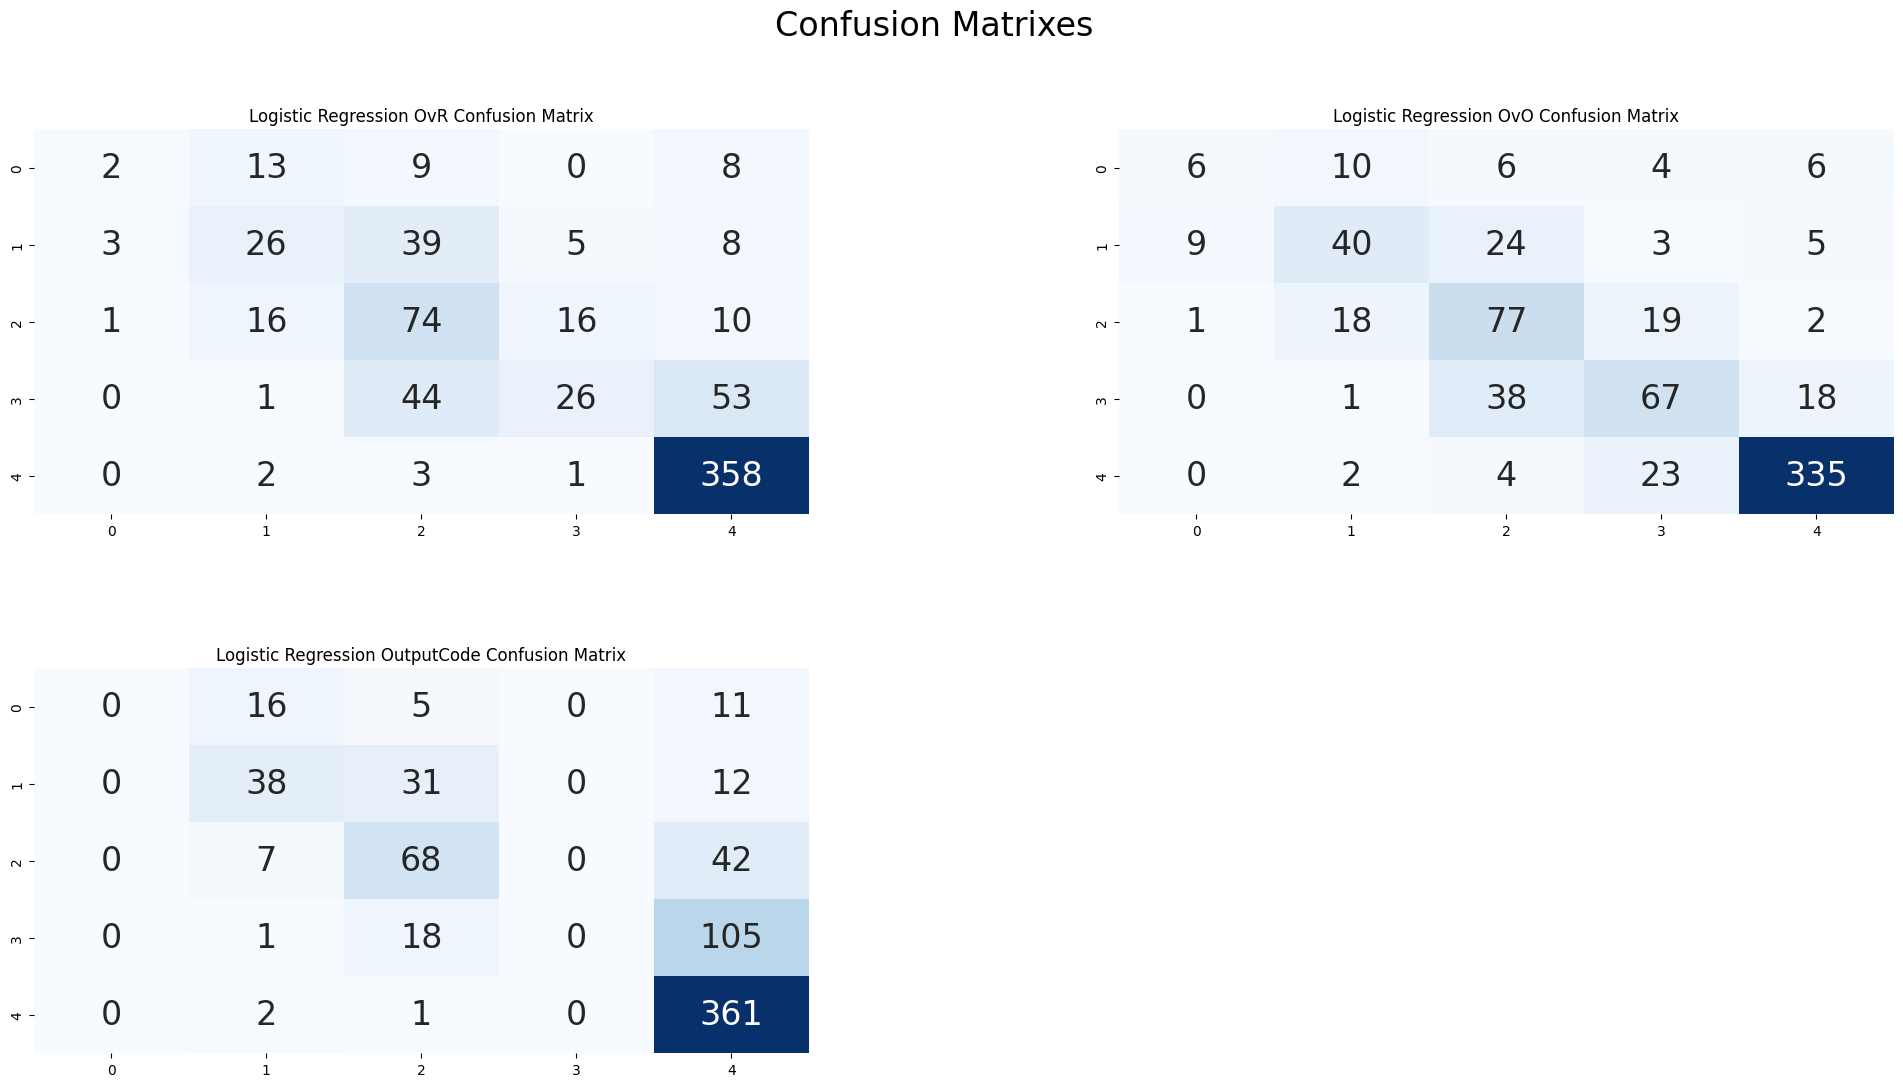

In [ ]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrixes", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Logistic Regression OvR Confusion Matrix")
sns.heatmap(cm_LR_OvR,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,2)
plt.title("Logistic Regression OvO Confusion Matrix")
sns.heatmap(cm_LR_OvO,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,3)
plt.title("Logistic Regression OutputCode Confusion Matrix")
sns.heatmap(cm_LR_OutputCode,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

In [ ]:
print(clf_LR_OvR.score(X_test_scaled, y_test))
print(clf_LR_OvO.score(X_test_scaled, y_test))
print(clf_LR_OutputCode.score(X_test_scaled, y_test))

0.6768802228412256
0.7311977715877437
0.6504178272980501


In [ ]:
len(y_test)

718

В датасете классы являются несбалансированным. Для таких датасетов и AUC_ROC и Accuracy являются плохими методами оценки качества предсказаний модели, но Accuracy всё же лучше в данном случае: если посмотреть на confusion matrix, то видно что OutputCode совсем не предсказывает класс 0 и 3, а OvR плохо предсказывает классы 0, 1 и 3. Лучше всех предсказания у стратегии OvO, которая не содержит нулевых значений на главной диагонали, и несмотря на то что она хуже предсказывает класс 4, чем остальные стратегии, она более предпочтительна, так как лучше пресдказывает оставшиеся классы.

Этот факт и отражается в оценках Accuracy:


1.   OvO Accuracy 0.73
2.   OvR Accuracy 0.68
3.   OutputCode Accuracy 0.65



Поэтому несмотря на то, что в задании указано использовать для оценки качества AUC_ROC, лучше ориентироваться на Accuracy при выборе модели


---

Возьмём разведочный анализ из первого практического задания

In [ ]:
df = pd.read_csv('/content/melb_data.csv')
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [ ]:
df.isnull().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Предварительно удалим очевидно избыточные и ненужные для данной задачи признаки:

Признак Address имеет избыточную информацию (13580 разных адресов), которую вполне может нести признак Suburb, вместо того чтобы смотреть на каждое конкретное здание, модель будет ориентироваться на район или застроку из домов, которые можно выделить как благополучные или нет и т.д.

Признак Method: не имеет значение каким способом был приобретена недвижимость будь то аукцион, продажа имущества или подробности сделки скрыты, если задача касается оценки её цены. Важны внутренние и внешние факторы, касающиеся недвижимости, а не детали процедуры покупки.

Из похожих рассуждений стоит удалить признаки SellerG, Postcode, CouncilArea, Lattitude, Longtitude

Но признаки SellerG и Method ещё пригодяться для анализа, поэтому удалим их позже

In [ ]:
df.drop(['Postcode','CouncilArea','Lattitude','Longtitude','Address'], axis=1, inplace=True)
df

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount
0,Abbotsford,2,h,1480000.0,S,Biggin,3/12/2016,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1035000.0,S,Biggin,4/02/2016,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,4019.0
2,Abbotsford,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan,4019.0
3,Abbotsford,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Northern Metropolitan,4019.0
4,Abbotsford,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,1245000.0,S,Barry,26/08/2017,16.7,4.0,2.0,2.0,652.0,NaN,1981.0,South-Eastern Metropolitan,7392.0
13576,Williamstown,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3.0,2.0,2.0,333.0,133.0,1995.0,Western Metropolitan,6380.0
13577,Williamstown,3,h,1170000.0,S,Raine,26/08/2017,6.8,3.0,2.0,4.0,436.0,NaN,1997.0,Western Metropolitan,6380.0
13578,Williamstown,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,4.0,1.0,5.0,866.0,157.0,1920.0,Western Metropolitan,6380.0


Рассмотрим признак Date

Для этого создадим признак Dataperiod, разделив всё время на периоды по полгода и посмотрим на среднюю цену недвижимости

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [ ]:
earliest_date = df['Date'].min()
latest_date = df['Date'].max()
iter = 0

df['Dataperiod'] = 0
while earliest_date < latest_date:
  df.loc[(df['Date'] >= earliest_date) & (df['Date'] < earliest_date + pd.DateOffset(months=6)), 'Dataperiod'] = iter
  iter = iter + 1
  earliest_date = earliest_date + pd.DateOffset(months=6)
df

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Dataperiod
0,Abbotsford,2,h,1480000.0,S,Biggin,2016-12-03,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Northern Metropolitan,4019.0,1
1,Abbotsford,2,h,1035000.0,S,Biggin,2016-02-04,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,4019.0,0
2,Abbotsford,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan,4019.0,2
3,Abbotsford,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Northern Metropolitan,4019.0,2
4,Abbotsford,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Northern Metropolitan,4019.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,1245000.0,S,Barry,2017-08-26,16.7,4.0,2.0,2.0,652.0,NaN,1981.0,South-Eastern Metropolitan,7392.0,3
13576,Williamstown,3,h,1031000.0,SP,Williams,2017-08-26,6.8,3.0,2.0,2.0,333.0,133.0,1995.0,Western Metropolitan,6380.0,3
13577,Williamstown,3,h,1170000.0,S,Raine,2017-08-26,6.8,3.0,2.0,4.0,436.0,NaN,1997.0,Western Metropolitan,6380.0,3
13578,Williamstown,4,h,2500000.0,PI,Sweeney,2017-08-26,6.8,4.0,1.0,5.0,866.0,157.0,1920.0,Western Metropolitan,6380.0,3


In [ ]:
df['Dataperiod'].value_counts()

,count
Dataperiod,
2,5149
1,4085
0,2251
3,2095


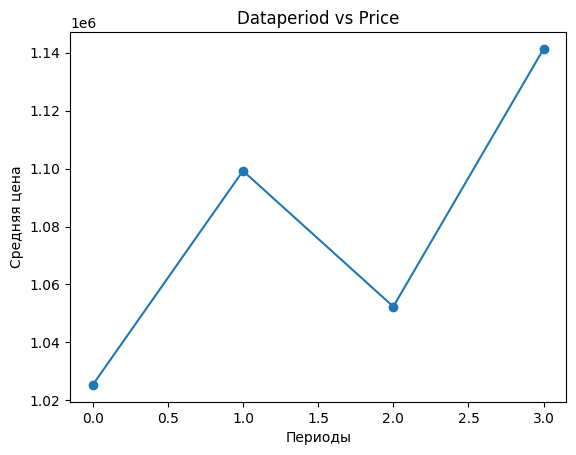

In [ ]:
Price_mean = np.array(df.groupby(['Dataperiod'])['Price'].mean())
Periods_nums = np.arange(iter)

plt.plot(Periods_nums, Price_mean, marker='o')

plt.title("Dataperiod vs Price")
plt.xlabel("Периоды")
plt.ylabel("Средняя цена")

plt.show()

Можно заметить что тенденция с течением времени идёт на рост цен

Несмотря на то, что в датасете всего 4 периода (2 неполных года), можно сделать следующие выводы

В 0 период было куплено всего 2251 объект недвижимости, после роста цен на 10% в следующем периоде было куплено 4085 объектов, это можно объяснить, что люди начали экстренно скупать недвижимость, опасаясь дальнейшего роста. В период самых низких цен было куплено больше всего объектов, а когда цена пробила новый потолок, то объектов было куплено меньше всего.

По итогу этот признак можно посчитать полезным чтобы качественно предсказывать цены

Оставим новый созданный признак Dataperiod и удалим признак Date

In [ ]:
df.drop(['Date'], axis=1, inplace=True)
df

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Dataperiod
0,Abbotsford,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Northern Metropolitan,4019.0,1
1,Abbotsford,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,4019.0,0
2,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan,4019.0,2
3,Abbotsford,3,h,850000.0,PI,Biggin,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Northern Metropolitan,4019.0,2
4,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Northern Metropolitan,4019.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,1245000.0,S,Barry,16.7,4.0,2.0,2.0,652.0,NaN,1981.0,South-Eastern Metropolitan,7392.0,3
13576,Williamstown,3,h,1031000.0,SP,Williams,6.8,3.0,2.0,2.0,333.0,133.0,1995.0,Western Metropolitan,6380.0,3
13577,Williamstown,3,h,1170000.0,S,Raine,6.8,3.0,2.0,4.0,436.0,NaN,1997.0,Western Metropolitan,6380.0,3
13578,Williamstown,4,h,2500000.0,PI,Sweeney,6.8,4.0,1.0,5.0,866.0,157.0,1920.0,Western Metropolitan,6380.0,3


Просто удалим 62 записи, которые содержат Nan значения в признаке Car, которые составляют 0,46 процентов от всех записей

In [ ]:
index_value = df.index[df['Car'].isnull()].tolist()

In [ ]:
df.drop(index_value, inplace=True)
df

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Dataperiod
0,Abbotsford,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Northern Metropolitan,4019.0,1
1,Abbotsford,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,4019.0,0
2,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan,4019.0,2
3,Abbotsford,3,h,850000.0,PI,Biggin,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Northern Metropolitan,4019.0,2
4,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Northern Metropolitan,4019.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,1245000.0,S,Barry,16.7,4.0,2.0,2.0,652.0,NaN,1981.0,South-Eastern Metropolitan,7392.0,3
13576,Williamstown,3,h,1031000.0,SP,Williams,6.8,3.0,2.0,2.0,333.0,133.0,1995.0,Western Metropolitan,6380.0,3
13577,Williamstown,3,h,1170000.0,S,Raine,6.8,3.0,2.0,4.0,436.0,NaN,1997.0,Western Metropolitan,6380.0,3
13578,Williamstown,4,h,2500000.0,PI,Sweeney,6.8,4.0,1.0,5.0,866.0,157.0,1920.0,Western Metropolitan,6380.0,3


Поробуем заполнить другие пропущенные значения в признаках BuildingArea и YearBuilt

Предпопологаю, что BuildingArea может зависить от Room, Bedroom2, Bathroom, Type

Но перед этим трансформируем признак Type из строки в число

In [ ]:
df['Type'].value_counts()

,count
Type,
h,9389
u,3015
t,1114


In [ ]:
df['Type'].replace(['h', 'u', 't'], [0, 1, 2], inplace=True)

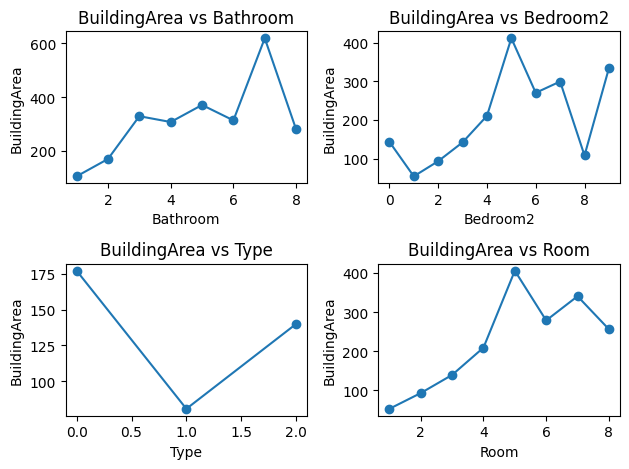

In [ ]:
BuildingArea_mean_Bathroom = np.array(df.groupby(['Bathroom'])['BuildingArea'].mean())
Bathroom_nums = np.sort(np.array(df['Bathroom'].unique()))

BuildingArea_mean_Bedroom2 = np.array(df.groupby(['Bedroom2'])['BuildingArea'].mean())
Bedroom2_nums = np.sort(np.array(df['Bedroom2'].unique()))

BuildingArea_mean_Type = np.array(df.groupby(['Type'])['BuildingArea'].mean())
Type_nums = np.sort(np.array(df['Type'].unique()))

BuildingArea_mean_Room = np.array(df.groupby(['Rooms'])['BuildingArea'].mean())
Room_nums = np.sort(np.array(df['Rooms'].unique()))

plt.subplot(2, 2, 1)
plt.plot(Bathroom_nums, BuildingArea_mean_Bathroom, marker='o')
plt.xlabel("Bathroom")
plt.ylabel("BuildingArea")
plt.title('BuildingArea vs Bathroom')

plt.subplot(2, 2, 2)
plt.plot(Bedroom2_nums, BuildingArea_mean_Bedroom2, marker='o')
plt.xlabel("Bedroom2")
plt.ylabel("BuildingArea")
plt.title('BuildingArea vs Bedroom2')

plt.subplot(2, 2, 3)
plt.plot(Type_nums, BuildingArea_mean_Type, marker='o')
plt.xlabel("Type")
plt.ylabel("BuildingArea")
plt.title('BuildingArea vs Type')

plt.subplot(2, 2, 4)
plt.plot(Room_nums, BuildingArea_mean_Room, marker='o')
plt.xlabel("Room")
plt.ylabel("BuildingArea")
plt.title('BuildingArea vs Room')

plt.tight_layout()
plt.show()

По графикам можно сделать вывод, что существует некоторая зависимость от количества ванных комнат и просто комнат

И очень слабая и неявная от количества спален

Но есть объяснимая зависимость от типа здания

Если здание h (дом, коттедж, вилла), то его средняя площадь 175, если здания типа u (блок, дуплекс), то его средняя площадь меньше 100, а если здание типа t (таунхаус), то его средняя площадь равна 140.

In [ ]:
df['Bathroom'].value_counts()

,count
Bathroom,
1.0,7467
2.0,4958
3.0,916
4.0,106
0.0,34
5.0,28
6.0,5
7.0,2
8.0,2


In [ ]:
df['Rooms'].value_counts()

,count
Rooms,
3,5852
2,3622
4,2684
1,678
5,596
6,67
7,10
8,8
10,1


У нас есть данные с количесвом Bathroom 6, 7 и 8

Таких объектов 5+2+2 = 9

И так же один объект с количеством Rooms 10

Просто избавимся от них как от выбросов

И будем рассчитывать BuildingArea используя среднюю по трём величинам признаков Type, Bathroom и Rooms

In [ ]:
ind = df[(df['Bathroom'] == 6) | (df['Bathroom'] == 7) | (df['Bathroom'] == 8)].index.tolist()
df.drop(ind, inplace=True)

ind = df[(df['Rooms'] == 10)].index.tolist()
df.drop(ind, inplace=True)

df

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Dataperiod
0,Abbotsford,2,0,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Northern Metropolitan,4019.0,1
1,Abbotsford,2,0,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,4019.0,0
2,Abbotsford,3,0,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan,4019.0,2
3,Abbotsford,3,0,850000.0,PI,Biggin,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Northern Metropolitan,4019.0,2
4,Abbotsford,4,0,1600000.0,VB,Nelson,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Northern Metropolitan,4019.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,0,1245000.0,S,Barry,16.7,4.0,2.0,2.0,652.0,NaN,1981.0,South-Eastern Metropolitan,7392.0,3
13576,Williamstown,3,0,1031000.0,SP,Williams,6.8,3.0,2.0,2.0,333.0,133.0,1995.0,Western Metropolitan,6380.0,3
13577,Williamstown,3,0,1170000.0,S,Raine,6.8,3.0,2.0,4.0,436.0,NaN,1997.0,Western Metropolitan,6380.0,3
13578,Williamstown,4,0,2500000.0,PI,Sweeney,6.8,4.0,1.0,5.0,866.0,157.0,1920.0,Western Metropolitan,6380.0,3


In [ ]:
arr1 = df.groupby(['Bathroom'])['BuildingArea'].mean().tolist()
arr1

[nan,
 105.95004215012374,
 170.22971172685018,
 328.93718498233216,
 307.307972972973,
 370.515]

In [ ]:
arr2 = df.groupby(['Rooms'])['BuildingArea'].mean().tolist()
arr2

[52.53959654178675,
 92.83187162891046,
 139.14018766519825,
 208.94118762886598,
 405.9865800578035,
 276.04285714285714,
 340.42333333333335,
 135.33333333333334]

In [ ]:
arr1 = np.nan_to_num(arr1, nan=0)

In [ ]:
for i in range(3):
  for j in range(6):
    for k in range(8):
      df.loc[(df['Type'] == i) & (df['Bathroom'] == j) & (df['Rooms'] == k),'BuildingArea'] = (BuildingArea_mean_Type[i] + arr1[j] + arr2[k])/3
df

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Dataperiod
0,Abbotsford,2,0,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,140.774280,NaN,Northern Metropolitan,4019.0,1
1,Abbotsford,2,0,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,140.774280,1900.0,Northern Metropolitan,4019.0,0
2,Abbotsford,3,0,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,185.467836,1900.0,Northern Metropolitan,4019.0,2
3,Abbotsford,3,0,850000.0,PI,Biggin,2.5,3.0,2.0,1.0,94.0,185.467836,NaN,Northern Metropolitan,4019.0,2
4,Abbotsford,4,0,1600000.0,VB,Nelson,2.5,3.0,1.0,2.0,120.0,229.723077,2014.0,Northern Metropolitan,4019.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,0,1245000.0,S,Barry,16.7,4.0,2.0,2.0,652.0,251.149634,1981.0,South-Eastern Metropolitan,7392.0,3
13576,Williamstown,3,0,1031000.0,SP,Williams,6.8,3.0,2.0,2.0,333.0,185.467836,1995.0,Western Metropolitan,6380.0,3
13577,Williamstown,3,0,1170000.0,S,Raine,6.8,3.0,2.0,4.0,436.0,185.467836,1997.0,Western Metropolitan,6380.0,3
13578,Williamstown,4,0,2500000.0,PI,Sweeney,6.8,4.0,1.0,5.0,866.0,229.723077,1920.0,Western Metropolitan,6380.0,3


Для того чтобы заполнить признак YearBuilt нужно определиться влияет ли год постройки здания на Price

Для этого создадим новый признак Yearperiod по значениям 25%, 50%, 75% для признака YearBuilt

In [ ]:
df.describe()

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,Dataperiod
count,13508.000000,13508.000000,1.350800e+04,13508.000000,13508.000000,13508.000000,13508.000000,13508.000000,13505.000000,8168.000000,13508.000000,13508.000000
mean,2.937741,0.388140,1.073768e+06,10.156818,2.913311,1.531833,1.608528,557.936038,175.376554,1964.900955,7455.330545,1.515472
std,0.951969,0.634395,6.372681e+05,5.861721,0.958821,0.679329,0.960303,3999.651482,53.320173,37.124844,4381.929526,0.940117
min,1.000000,0.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,57.856486,1196.000000,249.000000,0.000000
25%,2.000000,0.000000,6.500000e+05,6.200000,2.000000,1.000000,1.000000,178.000000,140.774280,1940.000000,4380.000000,1.000000
50%,3.000000,0.000000,9.007500e+05,9.200000,3.000000,1.000000,2.000000,442.000000,164.041280,1970.000000,6567.000000,2.000000
75%,3.000000,1.000000,1.327125e+06,13.000000,3.000000,2.000000,2.000000,651.000000,207.835059,1999.000000,10331.000000,2.000000
max,8.000000,2.000000,9.000000e+06,48.100000,20.000000,5.000000,10.000000,433014.000000,317.911396,2018.000000,21650.000000,3.000000


In [ ]:
df['Yearperiod'] = np.NaN
df.loc[(df['YearBuilt'] <= 1940),'Yearperiod'] = 0
df.loc[(df['YearBuilt'] > 1940) & (df['YearBuilt'] <= 1970),'Yearperiod'] = 1
df.loc[(df['YearBuilt'] > 1970) & (df['YearBuilt'] <= 1999),'Yearperiod'] = 2
df.loc[df['YearBuilt'] > 1999,'Yearperiod'] = 3

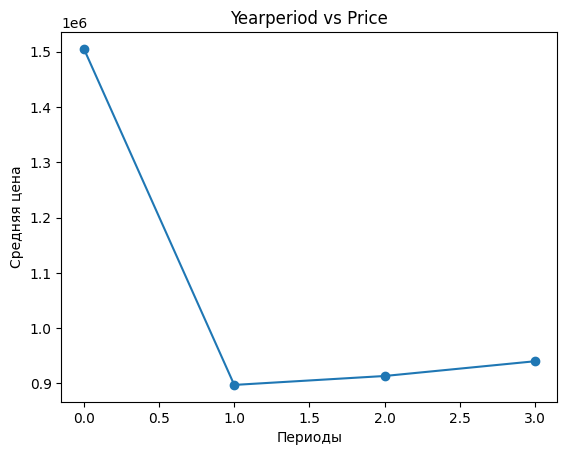

In [ ]:
Price_mean = np.array(df.groupby(['Yearperiod'])['Price'].mean())
Periods_nums = np.arange(4)

plt.plot(Periods_nums, Price_mean, marker='o')

plt.title("Yearperiod vs Price")
plt.xlabel("Периоды")
plt.ylabel("Средняя цена")

plt.show()

Заметно, что здания построенные до 1940 года обладают стоимостью в два раза превышающюю современные здания, и дальше чем новее здание, тем дороже оно стоит.

Поэтому стоит попытаться заполнить этот признак

Предполагаю, что есть районы или пригорды, где эти здания преимуществно находяться

In [ ]:
df[(df['Yearperiod'] == 0)]['Regionname'].value_counts()

,count
Regionname,
Southern Metropolitan,894
Northern Metropolitan,686
Western Metropolitan,410
Eastern Metropolitan,58
South-Eastern Metropolitan,7
Northern Victoria,2
Eastern Victoria,1


Больше всего старые здания находятся в SM, NM и WM

<Axes: xlabel='count', ylabel='Regionname'>

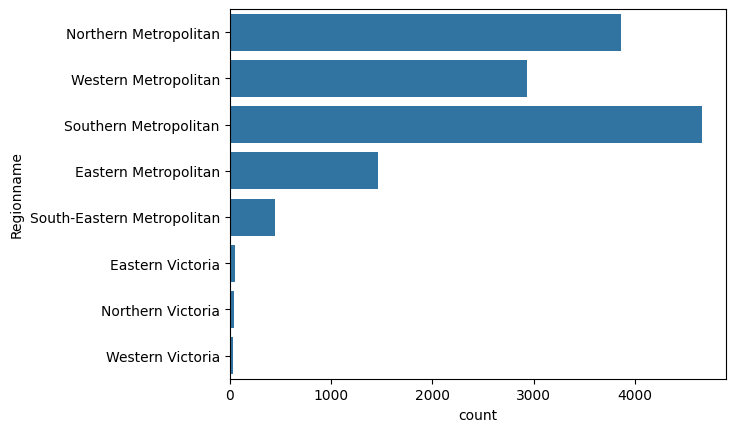

In [ ]:
sns.countplot(df['Regionname'])

Но на самом деле в целом в этих районах было совершенно больше всего покупок


In [ ]:
df2 = df[(df['Suburb'] == 'Brunswick') | (df['Suburb'] == 'Richmond') | (df['Suburb'] == 'Northcote') | (df['Suburb'] == 'Coburg')]

<Axes: xlabel='Yearperiod', ylabel='count'>

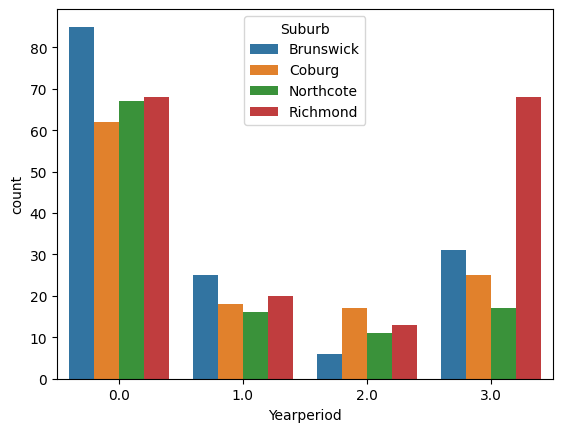

In [ ]:
sns.countplot(x ='Yearperiod', hue='Suburb', data=df2)

Самый многочисленный по старым зданиям район, так же содержит и обычные здания в соотношении 50 на 50, то есть он является смешенным и нет ярко выделенного пригорода, где продавались только старые здания

Район или пригород выделить не получилось

Попробуем найти агента, который продавал больше всего старых зданий

In [ ]:
df2 = df[(df['SellerG'] == 'Nelson') | (df['SellerG'] == 'Jellis') | (df['SellerG'] == 'Marshall') | (df['SellerG'] == 'hockingstuart')]

<Axes: xlabel='Yearperiod', ylabel='count'>

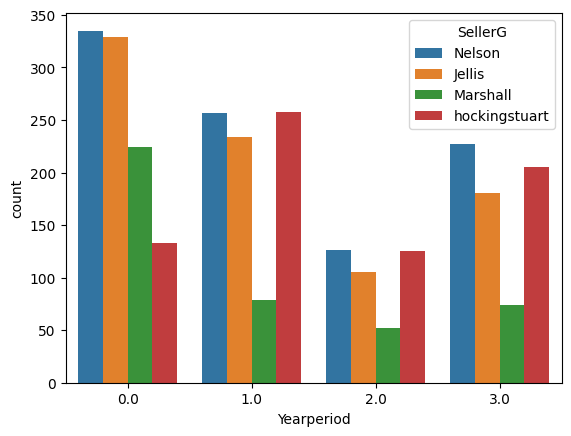

In [ ]:
sns.countplot(x ='Yearperiod', hue='SellerG', data=df2)

Схожая ситуация, больше всего старых домов продавали агенты, которые в целом продали больше всех

Хотя агент Marshal и выделяется на фоне остальных агентов, но он не специализируется на продаже только старых зданий

Поверим методы продажи

<Axes: xlabel='Yearperiod', ylabel='count'>

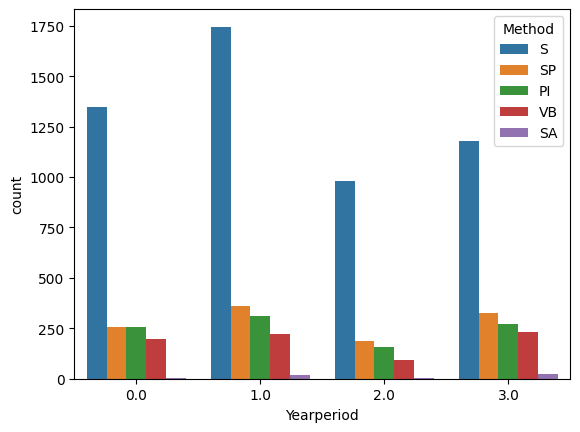

In [ ]:
sns.countplot(x ='Yearperiod', hue='Method', data=df)

In [ ]:
df['Yearperiod'].value_counts()

,count
Yearperiod,
1.0,2658
0.0,2058
3.0,2033
2.0,1419


Метод продажи ничего не даёт

Независимо от возраста здания все они продавались самым распрастранённым методом S

Идей для дальнейшего анализа не осталось. По этому есть три варианта решения:


*   Избавиться от строчек в которых пропущенно значение и тогда исчезнет полованиа датасета
*   Избавиться от признака YearBuilt
*   Либо заполнить пропущенные значения средним числом, что может помешать обучению и дать ложную информацию

Я решаю избавиться от признака, так как он в целом существенен только для старых зданий, процент которых составляет 25 от всего датасета, а оставшиеся 75% изменяются в цене от признака YearBuilt не так сильно

Так же удалим признаки, которые нам тоже уже не нужны SellerG, Method и созданный признак Yearperiod


In [ ]:
df.drop(['SellerG','Method','Yearperiod','YearBuilt'], axis=1, inplace=True)
df

,Suburb,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Regionname,Propertycount,Dataperiod
0,Abbotsford,2,0,1480000.0,2.5,2.0,1.0,1.0,202.0,140.774280,Northern Metropolitan,4019.0,1
1,Abbotsford,2,0,1035000.0,2.5,2.0,1.0,0.0,156.0,140.774280,Northern Metropolitan,4019.0,0
2,Abbotsford,3,0,1465000.0,2.5,3.0,2.0,0.0,134.0,185.467836,Northern Metropolitan,4019.0,2
3,Abbotsford,3,0,850000.0,2.5,3.0,2.0,1.0,94.0,185.467836,Northern Metropolitan,4019.0,2
4,Abbotsford,4,0,1600000.0,2.5,3.0,1.0,2.0,120.0,229.723077,Northern Metropolitan,4019.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,0,1245000.0,16.7,4.0,2.0,2.0,652.0,251.149634,South-Eastern Metropolitan,7392.0,3
13576,Williamstown,3,0,1031000.0,6.8,3.0,2.0,2.0,333.0,185.467836,Western Metropolitan,6380.0,3
13577,Williamstown,3,0,1170000.0,6.8,3.0,2.0,4.0,436.0,185.467836,Western Metropolitan,6380.0,3
13578,Williamstown,4,0,2500000.0,6.8,4.0,1.0,5.0,866.0,229.723077,Western Metropolitan,6380.0,3


Рассмотрим матрицу корреляций

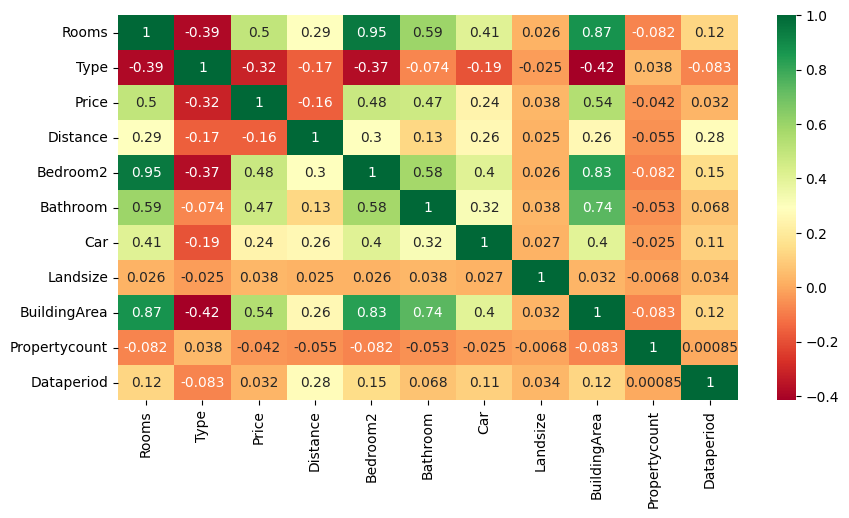

In [ ]:
df_numeric = df.select_dtypes(include=[float, int])

sns.heatmap(df_numeric.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

У нас есть 2 нецелевых признака, которые очень сильно коллерируют между собой, избавимся от одного из них.

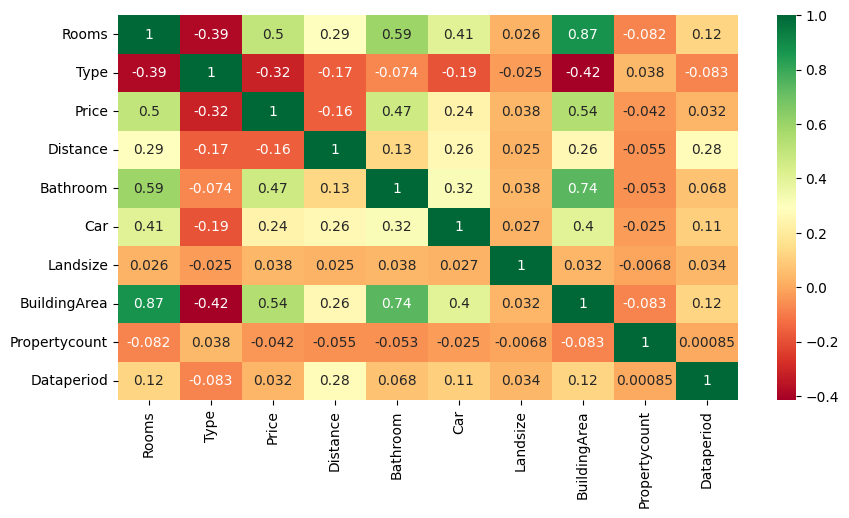

In [ ]:
df.drop(['Bedroom2'], axis=1, inplace=True)

df_numeric = df.select_dtypes(include=[float, int])

sns.heatmap(df_numeric.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [ ]:
df.drop(columns=['Suburb', 'Regionname'], axis=1, inplace=True)
df

,Rooms,Type,Price,Distance,Bathroom,Car,Landsize,BuildingArea,Propertycount,Dataperiod
0,2,0,1480000.0,2.5,1.0,1.0,202.0,140.774280,4019.0,1
1,2,0,1035000.0,2.5,1.0,0.0,156.0,140.774280,4019.0,0
2,3,0,1465000.0,2.5,2.0,0.0,134.0,185.467836,4019.0,2
3,3,0,850000.0,2.5,2.0,1.0,94.0,185.467836,4019.0,2
4,4,0,1600000.0,2.5,1.0,2.0,120.0,229.723077,4019.0,0
...,...,...,...,...,...,...,...,...,...,...
13575,4,0,1245000.0,16.7,2.0,2.0,652.0,251.149634,7392.0,3
13576,3,0,1031000.0,6.8,2.0,2.0,333.0,185.467836,6380.0,3
13577,3,0,1170000.0,6.8,2.0,4.0,436.0,185.467836,6380.0,3
13578,4,0,2500000.0,6.8,1.0,5.0,866.0,229.723077,6380.0,3


In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.groupby('Type')['Bathroom'].value_counts()

Type  Bathroom
0     1.0         4710
      2.0         3722
      3.0          801
      4.0          101
      5.0           28
      0.0           15
1     1.0         2440
      2.0          546
      0.0           17
      3.0           10
      4.0            1
2     2.0          689
      1.0          317
      3.0          103
      4.0            3
      0.0            2
Name: count, dtype: int64

In [109]:
df_filltred = df[df['Type'] != 2]

In [110]:
df_filltred.groupby('Type')['Bathroom'].value_counts()

Type  Bathroom
0     1.0         4710
      2.0         3722
      3.0          801
      4.0          101
      5.0           28
      0.0           15
1     1.0         2440
      2.0          546
      0.0           17
      3.0           10
      4.0            1
Name: count, dtype: int64

In [111]:
ind = df_filltred[(df_filltred['Bathroom'] == 3) | (df_filltred['Bathroom'] == 4) | (df_filltred['Bathroom'] == 5) | (df_filltred['Bathroom'] == 0 )].index.tolist()
df_filltred.drop(ind, inplace=True)
df_filltred

,Rooms,Type,Price,Distance,Bathroom,Car,Landsize,BuildingArea,Propertycount,Dataperiod
0,2,0,1480000.0,2.5,1.0,1.0,202.0,140.774280,4019.0,1
1,2,0,1035000.0,2.5,1.0,0.0,156.0,140.774280,4019.0,0
2,3,0,1465000.0,2.5,2.0,0.0,134.0,185.467836,4019.0,2
3,3,0,850000.0,2.5,2.0,1.0,94.0,185.467836,4019.0,2
4,4,0,1600000.0,2.5,1.0,2.0,120.0,229.723077,4019.0,0
...,...,...,...,...,...,...,...,...,...,...
13575,4,0,1245000.0,16.7,2.0,2.0,652.0,251.149634,7392.0,3
13576,3,0,1031000.0,6.8,2.0,2.0,333.0,185.467836,6380.0,3
13577,3,0,1170000.0,6.8,2.0,4.0,436.0,185.467836,6380.0,3
13578,4,0,2500000.0,6.8,1.0,5.0,866.0,229.723077,6380.0,3


In [112]:
df_filltred.groupby('Type')['Bathroom'].value_counts()

Type  Bathroom
0     1.0         4710
      2.0         3722
1     1.0         2440
      2.0          546
Name: count, dtype: int64

In [113]:
df_filltred.loc[(df_filltred['Bathroom'] == 1),'Bathroom'] = 0
df_filltred.loc[(df_filltred['Bathroom'] == 2),'Bathroom'] = 1

In [114]:
df_filltred.groupby('Type')['Bathroom'].value_counts()

Type  Bathroom
0     0.0         4710
      1.0         3722
1     0.0         2440
      1.0          546
Name: count, dtype: int64

In [121]:
y = df_filltred[['Type', 'Bathroom']]
X = df_filltred.drop(columns=['Type', 'Bathroom'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

X_train_non_scale = X_train

X_test_non_scale = X_test

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

results = {}

**Logistic Regression Multilabel classification**

In [128]:
from sklearn.multioutput import MultiOutputClassifier, ClassifierChain

C_values = np.logspace(-3, 2, 10)
cv = 5

def evaluate_strategy(strategy):
    log_reg = LogisticRegression(random_state=42, multi_class='multinomial')

    # Определяем стратегию
    if strategy == "MultiOutputClassifier":
        clf = MultiOutputClassifier(log_reg)
        param_grid = {'estimator__C': C_values}
    elif strategy == "ClassifierChain":
        clf = ClassifierChain(log_reg)
        param_grid = {'base_estimator__C': C_values}
    else:
        raise ValueError("Unknown strategy")

    grid = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=cv, verbose=1)

    start_time = time.time()
    grid.fit(X_train, y_train)
    training_time = time.time() - start_time

    best_model = grid.best_estimator_
    auc_roc = []

    # Предсказания вероятностей
    if strategy == "ClassifierChain":
        X_chain = X_test.copy()
        y_pred_proba = []
        for i, estimator in enumerate(best_model.estimators_):
            proba = estimator.predict_proba(X_chain)
            y_pred_proba.append(proba)
            X_chain = np.hstack([X_test, np.column_stack([pred[:, 1] for pred in y_pred_proba])])
        for i, target in enumerate(y.columns):
            proba = y_pred_proba[i]
            proba = proba[:, :len(pd.get_dummies(y_test.iloc[:, i]).columns)]
            auc = roc_auc_score(pd.get_dummies(y_test.iloc[:, i]).values, proba, multi_class='ovr')
            auc_roc.append(auc)
    elif strategy == "MultiOutputClassifier":
        y_pred_proba = best_model.predict_proba(X_test)
        for i, target in enumerate(y.columns):
            proba = y_pred_proba[i]
            if proba.ndim == 1:
                proba = np.vstack([1 - proba, proba]).T
            auc = roc_auc_score(pd.get_dummies(y_test.iloc[:, i]).values, proba, multi_class='ovr')
            auc_roc.append(auc)

    avg_auc_roc = np.mean(auc_roc)

    return {
        "best_params": grid.best_params_,
        "best_score": grid.best_score_,
        "training_time": training_time,
        "auc": auc,
    }

strategies = ["MultiOutputClassifier", "ClassifierChain"]

for strategy in strategies:
    print(f"Evaluating strategy: {strategy}")
    results['Logistic Regression ' + strategy] = evaluate_strategy(strategy)

Evaluating strategy: MultiOutputClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Evaluating strategy: ClassifierChain
Fitting 5 folds for each of 10 candidates, totalling 50 fits


**K-Nearest Neighbour Multilabel classification**

In [127]:
n_neighbors = np.arange(1, 11, 2)
weights = ['uniform', 'distance']
cv = 5

def evaluate_strategy(strategy):
    knn = KNeighborsClassifier()

    # Определяем стратегию
    if strategy == "MultiOutputClassifier":
        clf = MultiOutputClassifier(knn)
        param_grid = {'estimator__n_neighbors': n_neighbors, 'estimator__weights': weights}
    elif strategy == "ClassifierChain":
        clf = ClassifierChain(knn)
        param_grid = {'base_estimator__n_neighbors': n_neighbors, 'base_estimator__weights': weights}
    else:
        raise ValueError("Unknown strategy")

    grid = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=cv, verbose=1)

    start_time = time.time()
    grid.fit(X_train, y_train)
    training_time = time.time() - start_time

    best_model = grid.best_estimator_
    auc_roc = []

    # Предсказания вероятностей
    if strategy == "ClassifierChain":
        X_chain = X_test.copy()
        y_pred_proba = []
        for i, estimator in enumerate(best_model.estimators_):
            proba = estimator.predict_proba(X_chain)
            y_pred_proba.append(proba)
            X_chain = np.hstack([X_test, np.column_stack([pred[:, 1] for pred in y_pred_proba])])
        for i, target in enumerate(y.columns):
            proba = y_pred_proba[i]
            proba = proba[:, :len(pd.get_dummies(y_test.iloc[:, i]).columns)]
            auc = roc_auc_score(pd.get_dummies(y_test.iloc[:, i]).values, proba, multi_class='ovr')
            auc_roc.append(auc)
    elif strategy == "MultiOutputClassifier":
        y_pred_proba = best_model.predict_proba(X_test)
        for i, target in enumerate(y.columns):
            proba = y_pred_proba[i]
            if proba.ndim == 1:
                proba = np.vstack([1 - proba, proba]).T
            auc = roc_auc_score(pd.get_dummies(y_test.iloc[:, i]).values, proba, multi_class='ovr')
            auc_roc.append(auc)

    avg_auc_roc = np.mean(auc_roc)

    return {
        "best_params": grid.best_params_,
        "best_score": grid.best_score_,
        "training_time": training_time,
        "auc": auc,
    }

strategies = ["MultiOutputClassifier", "ClassifierChain"]

for strategy in strategies:
    print(f"Evaluating strategy: {strategy}")
    results['KNN ' + strategy] = evaluate_strategy(strategy)

Evaluating strategy: MultiOutputClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Evaluating strategy: ClassifierChain
Fitting 5 folds for each of 10 candidates, totalling 50 fits


**SVM Multilabel classification**

In [126]:
from sklearn.model_selection import RandomizedSearchCV

C = [0.1, 1, 2]
kernel = ["linear", "rbf"]
gamma = ["scale", "auto"]
cv = 5

def evaluate_strategy(strategy):
    svc = SVC(probability=True, random_state=42)

    # Определяем стратегию
    if strategy == "MultiOutputClassifier":
        clf = MultiOutputClassifier(svc)
        param_grid = {'estimator__C': C, 'estimator__kernel': kernel, 'estimator__gamma': gamma}
    elif strategy == "ClassifierChain":
        clf = ClassifierChain(svc)
        param_grid = {'base_estimator__C': C, 'base_estimator__kernel': kernel, 'base_estimator__gamma': gamma}
    else:
        raise ValueError("Unknown strategy")

    grid = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, scoring='accuracy', cv=cv, verbose=1, n_jobs=-1)

    start_time = time.time()
    grid.fit(X_train, y_train)
    training_time = time.time() - start_time

    best_model = grid.best_estimator_
    auc_roc = []

    # Предсказания вероятностей
    if strategy == "ClassifierChain":
        X_chain = X_test.copy()
        y_pred_proba = []
        for i, estimator in enumerate(best_model.estimators_):
            proba = estimator.predict_proba(X_chain)
            y_pred_proba.append(proba)
            X_chain = np.hstack([X_test, np.column_stack([pred[:, 1] for pred in y_pred_proba])])
        for i, target in enumerate(y.columns):
            proba = y_pred_proba[i]
            proba = proba[:, :len(pd.get_dummies(y_test.iloc[:, i]).columns)]
            auc = roc_auc_score(pd.get_dummies(y_test.iloc[:, i]).values, proba, multi_class='ovr')
            auc_roc.append(auc)
    elif strategy == "MultiOutputClassifier":
        y_pred_proba = best_model.predict_proba(X_test)
        for i, target in enumerate(y.columns):
            proba = y_pred_proba[i]
            if proba.ndim == 1:
                proba = np.vstack([1 - proba, proba]).T
            auc = roc_auc_score(pd.get_dummies(y_test.iloc[:, i]).values, proba, multi_class='ovr')
            auc_roc.append(auc)

    avg_auc_roc = np.mean(auc_roc)

    return {
        "best_params": grid.best_params_,
        "best_score": grid.best_score_,
        "training_time": training_time,
        "auc": auc,
    }

strategies = ["MultiOutputClassifier", "ClassifierChain"]

for strategy in strategies:
    print(f"Evaluating strategy: {strategy}")
    results['SVC ' + strategy] = evaluate_strategy(strategy)

Evaluating strategy: MultiOutputClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Evaluating strategy: ClassifierChain
Fitting 5 folds for each of 10 candidates, totalling 50 fits


**Naive Bayes Algorithm Multilabel classification**

In [122]:
priors = [None, [0.62, 0.38]]
var_smoothing = np.logspace(0, -9, num=10)

cv = 5

def evaluate_strategy(strategy):
    nb = GaussianNB()

    # Определяем стратегию
    if strategy == "MultiOutputClassifier":
        clf = MultiOutputClassifier(nb)
        param_grid = {'estimator__priors': priors, 'estimator__var_smoothing': var_smoothing}
    elif strategy == "ClassifierChain":
        clf = ClassifierChain(nb)
        param_grid = {'base_estimator__priors': priors, 'base_estimator__var_smoothing': var_smoothing}
    else:
        raise ValueError("Unknown strategy")

    grid = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=cv, verbose=1, n_jobs=-1)

    start_time = time.time()
    grid.fit(X_train_non_scale, y_train)
    training_time = time.time() - start_time

    best_model = grid.best_estimator_
    auc_roc = []

    # Предсказания вероятностей
    if strategy == "ClassifierChain":
        X_chain = X_test_non_scale.copy()
        y_pred_proba = []
        for i, estimator in enumerate(best_model.estimators_):
            proba = estimator.predict_proba(X_chain)
            y_pred_proba.append(proba)
            X_chain = np.hstack([X_test_non_scale, np.column_stack([pred[:, 1] for pred in y_pred_proba])])
        for i, target in enumerate(y.columns):
            proba = y_pred_proba[i]
            proba = proba[:, :len(pd.get_dummies(y_test.iloc[:, i]).columns)]
            auc = roc_auc_score(pd.get_dummies(y_test.iloc[:, i]).values, proba, multi_class='ovr')
            auc_roc.append(auc)
    elif strategy == "MultiOutputClassifier":
        y_pred_proba = best_model.predict_proba(X_test_non_scale)
        for i, target in enumerate(y.columns):
            proba = y_pred_proba[i]
            if proba.ndim == 1:
                proba = np.vstack([1 - proba, proba]).T
            auc = roc_auc_score(pd.get_dummies(y_test.iloc[:, i]).values, proba, multi_class='ovr')
            auc_roc.append(auc)

    avg_auc_roc = np.mean(auc_roc)

    return {
        "best_params": grid.best_params_,
        "best_score": grid.best_score_,
        "training_time": training_time,
        "auc": auc,
    }

strategies = ["MultiOutputClassifier", "ClassifierChain"]

for strategy in strategies:
    print(f"Evaluating strategy: {strategy}")
    results['Naive Bayes ' + strategy] = evaluate_strategy(strategy)

Evaluating strategy: MultiOutputClassifier
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Evaluating strategy: ClassifierChain
Fitting 5 folds for each of 20 candidates, totalling 100 fits


**Decision Tree Algorithm Multilabel classification**

In [124]:
criterion = ["gini", "entropy", "log_loss"]
max_depth = [2, 3, 5, 7, 9]
min_samples_split = [2, 4, 10]
min_samples_leaf = [1, 2, 4]

cv = 5

def evaluate_strategy(strategy):
    dtc = DecisionTreeClassifier(random_state=42)

    # Определяем стратегию
    if strategy == "MultiOutputClassifier":
        clf = MultiOutputClassifier(dtc)
        param_grid = {'estimator__criterion': criterion, 'estimator__max_depth': max_depth,
                      'estimator__min_samples_split': min_samples_split, 'estimator__min_samples_leaf': min_samples_leaf}
    elif strategy == "ClassifierChain":
        clf = ClassifierChain(dtc)
        param_grid = {'base_estimator__criterion': criterion, 'base_estimator__max_depth': max_depth,
                      'base_estimator__min_samples_split': min_samples_split, 'base_estimator__min_samples_leaf': min_samples_leaf}
    else:
        raise ValueError("Unknown strategy")

    grid = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=cv, verbose=1, n_jobs=-1)

    start_time = time.time()
    grid.fit(X_train, y_train)
    training_time = time.time() - start_time

    best_model = grid.best_estimator_
    auc_roc = []

    # Предсказания вероятностей
    if strategy == "ClassifierChain":
        X_chain = X_test.copy()
        y_pred_proba = []
        for i, estimator in enumerate(best_model.estimators_):
            proba = estimator.predict_proba(X_chain)
            y_pred_proba.append(proba)
            X_chain = np.hstack([X_test, np.column_stack([pred[:, 1] for pred in y_pred_proba])])
        for i, target in enumerate(y.columns):
            proba = y_pred_proba[i]
            proba = proba[:, :len(pd.get_dummies(y_test.iloc[:, i]).columns)]
            auc = roc_auc_score(pd.get_dummies(y_test.iloc[:, i]).values, proba, multi_class='ovr')
            auc_roc.append(auc)
    elif strategy == "MultiOutputClassifier":
        y_pred_proba = best_model.predict_proba(X_test)
        for i, target in enumerate(y.columns):
            proba = y_pred_proba[i]
            if proba.ndim == 1:
                proba = np.vstack([1 - proba, proba]).T
            auc = roc_auc_score(pd.get_dummies(y_test.iloc[:, i]).values, proba, multi_class='ovr')
            auc_roc.append(auc)

    avg_auc_roc = np.mean(auc_roc)

    return {
        "best_params": grid.best_params_,
        "best_score": grid.best_score_,
        "training_time": training_time,
        "auc": auc,
    }

strategies = ["MultiOutputClassifier", "ClassifierChain"]

for strategy in strategies:
    print(f"Evaluating strategy: {strategy}")
    results['DTC ' + strategy] = evaluate_strategy(strategy)

Evaluating strategy: MultiOutputClassifier
Fitting 5 folds for each of 135 candidates, totalling 675 fits
Evaluating strategy: ClassifierChain
Fitting 5 folds for each of 135 candidates, totalling 675 fits


In [129]:
for strategy, result in results.items():
    print(f"Strategy: {strategy}")
    print(f"  Best Params: {result['best_params']}")
    print(f"  Best score: {result['best_score']}")
    print(f"  Training Time: {result['training_time']:.2f} seconds")
    print(f"  AUC-ROC: {result['auc']:.4f}")

Strategy: Naive Bayes MultiOutputClassifier
  Best Params: {'estimator__priors': None, 'estimator__var_smoothing': 1e-09}
  Best score: 0.7243510297815984
  Training Time: 3.29 seconds
  AUC-ROC: 0.8743
Strategy: Naive Bayes ClassifierChain
  Best Params: {'base_estimator__priors': None, 'base_estimator__var_smoothing': 1e-09}
  Best score: 0.7244761862271554
  Training Time: 1.49 seconds
  AUC-ROC: 0.8743
Strategy: DTC MultiOutputClassifier
  Best Params: {'estimator__criterion': 'entropy', 'estimator__max_depth': 7, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 4}
  Best score: 0.9994993742177722
  Training Time: 17.86 seconds
  AUC-ROC: 0.9990
Strategy: DTC ClassifierChain
  Best Params: {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 7, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 10}
  Best score: 0.9994993742177722
  Training Time: 16.29 seconds
  AUC-ROC: 0.9990
Strategy: SVC MultiOutputClassifier
  Best Pa

In [130]:
print(np.mean(y_test, axis=0))

Type        0.261529
Bathroom    0.373905
dtype: float64


Несмотря на то классы не сбалансированы, все модели показывают хороший результат как по accuracy на тренировочных данных при обучении, так и roc_auc на новых тестовых данных.

Лучше всего себя показала модель DTC с точностью 0.99

Лучшая точность у моделей со стратегией ClassifierChain

Стратегия ClassifierChain в целом работает быстрее, чем MultiOutputClassifier

**Создадим целевой признак y из двух вещественных признаков BuildingArea и Price**


---



In [131]:
y = df[['Price', 'BuildingArea']]
X = df.drop(columns=['Price', 'BuildingArea'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

results = {}

In [137]:
from sklearn.multioutput import MultiOutputRegressor, RegressorChain
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

alphas = np.logspace(-3, 2, 10)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_strategy(strategy_name):
    ridge = Ridge()

    if strategy_name == "MultiOutputRegressor":
        model = MultiOutputRegressor(ridge)
        param_grid = {'estimator__alpha': alphas}
    elif strategy_name == "RegressorChain":
        model = RegressorChain(ridge)
        param_grid = {'base_estimator__alpha': alphas}
    else:
        raise ValueError("Unknown strategy")

    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=cv, verbose=1)

    start_time = time.time()
    grid.fit(X_train, y_train)
    training_time = time.time() - start_time

    best_model = grid.best_estimator_

    y_pred = best_model.predict(X_test)

    r2 = r2_score(y_test, y_pred, multioutput='uniform_average')  # 'uniform_average' усредняет по всем целям

    return {
        "best_params": grid.best_params_,
        "best_score_cv": grid.best_score_,
        "training_time": training_time,
        "r2_test": r2
    }

strategies = ["MultiOutputRegressor", "RegressorChain"]

for strategy in strategies:
    print(f"Evaluating strategy: {strategy}")
    results[strategy] = evaluate_strategy(strategy)

for strategy, result in results.items():
    print(f"\nStrategy: {strategy}")
    print(f"  Best Params: {result['best_params']}")
    print(f"  Best Cross-Validated R2: {result['best_score_cv']:.4f}")
    print(f"  Training Time: {result['training_time']:.2f} seconds")
    print(f"  Test R2: {result['r2_test']:.4f}")

Evaluating strategy: MultiOutputRegressor
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Evaluating strategy: RegressorChain
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Strategy: MultiOutputRegressor
  Best Params: {'estimator__alpha': 100.0}
  Best Cross-Validated R2: 0.6459
  Training Time: 1.60 seconds
  Test R2: 0.6357

Strategy: RegressorChain
  Best Params: {'base_estimator__alpha': 100.0}
  Best Cross-Validated R2: 0.6459
  Training Time: 1.98 seconds
  Test R2: 0.6357


Модели получили одинаковую хорошую точность R2 = 0.64 на тестовой и тренировочной выборке

Стратегия RegressorChain выполняется немного медленнее


